# **MODELADO PARA PRECIPITACIÓN EN PUEBLA**

Ubicación de la estación: 19.0000, -98.1833




Precipitación v4:  
https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-monthly
https://www.ncei.noaa.gov/data/ghcnm/v4/precipitation/
https://www.ncei.noaa.gov/pub/data/ghcn/v4/products/StationPlots/MX/


Nombres:  
https://www.ncei.noaa.gov/pub/data/ghcn/v4/  
https://www.ncei.noaa.gov/data/ghcnm/v4/precipitation/doc/


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
sns.set(style="whitegrid")

In [82]:
# The color palette is made up of the 20 colors. Hex color codes:  #395e77, #413344,  #614c65,  #806485,  #936397,  #a662a8,  #664972,  #463c57,  #6e8da9,  #91bcdd,  #567d99,  #305662,  #264d4d,  #315c45,  #8a9a65,  #b6b975,  #b65d54,  #b60033,  #98062d and  #800022.
# https://colorkit.co/palette/413344-614c65-806485-936397-a662a8-664972-463c57-6e8da9-91bcdd-567d99-395e77-305662-264d4d-315c45-8a9a65-b6b975-b65d54-b60033-98062d-800022/
sns.set_palette(["#194a7a", "#b60033", "#315c45", "#b65d54", "#B9445F", "#567d99", "#395e77", "#413344", "#614c65", "#806485", "#936397", "#a662a8", "#664972", "#463c57", "#6e8da9", "#91bcdd", "#305662", "#264d4d",  "#8a9a65", "#b6b975", "#98062d", "#800022"])
sns.color_palette()

[(0.09803921568627451, 0.2901960784313726, 0.47843137254901963),
 (0.7137254901960784, 0.0, 0.2),
 (0.19215686274509805, 0.3607843137254902, 0.27058823529411763),
 (0.7137254901960784, 0.36470588235294116, 0.32941176470588235),
 (0.7254901960784313, 0.26666666666666666, 0.37254901960784315),
 (0.33725490196078434, 0.49019607843137253, 0.6),
 (0.2235294117647059, 0.3686274509803922, 0.4666666666666667),
 (0.2549019607843137, 0.2, 0.26666666666666666),
 (0.3803921568627451, 0.2980392156862745, 0.396078431372549),
 (0.5019607843137255, 0.39215686274509803, 0.5215686274509804),
 (0.5764705882352941, 0.38823529411764707, 0.592156862745098),
 (0.6509803921568628, 0.3843137254901961, 0.6588235294117647),
 (0.4, 0.28627450980392155, 0.4470588235294118),
 (0.27450980392156865, 0.23529411764705882, 0.3411764705882353),
 (0.43137254901960786, 0.5529411764705883, 0.6627450980392157),
 (0.5686274509803921, 0.7372549019607844, 0.8666666666666667),
 (0.18823529411764706, 0.33725490196078434, 0.3843137254901961),
 (0.14901960784313725, 0.30196078431372547, 0.30196078431372547),
 (0.5411764705882353, 0.6039215686274509, 0.396078431372549),
 (0.7137254901960784, 0.7254901960784313, 0.4588235294117647),
 (0.596078431372549, 0.023529411764705882, 0.17647058823529413),
 (0.5019607843137255, 0.0, 0.13333333333333333)]

In [83]:
# Personalización global con matplotlib
plt.rcParams.update({
    'axes.titlesize': 14,        # Tamaño del título
    'axes.titleweight': 'bold',  # Negrita en el título
    'xtick.labelsize': 8,        # Tamaño de los xticks
    'ytick.labelsize': 8,         # Tamaño de los yticks
    'grid.color': 'gray',         # Color de las líneas del grid
    'grid.linestyle': '--',       # Estilo de línea (puede ser '-', '--', '-.', ':')
    'grid.linewidth': 0.5,        # Grosor del grid
    'axes.grid': True,            # Asegura que el grid esté activado
    'axes.grid.axis': 'both',     # Aplica el grid a ambos ejes
    'lines.linewidth': 1.2,       # Grosor de las líneas
    'figure.figsize': (12, 6),   # Tamaño de la figura
})

In [84]:
data=pd.read_csv('MXN00021035.csv')

In [85]:
pre=data.iloc[:,6]  # Precipitacion, es la columna 5
date=data.iloc[:,5] # Date, es la columna 6
date = date.astype(str).str.replace(r'(\d{4})(\d{2})', r'\1/\2', regex=True)    # La fecha está como 195210 y la pasamos a 1952/10 
date = pd.to_datetime(date, format='%Y/%m')                                     # Lo convertimos en fecha
pre = pd.Series(pre.values, index=date)                                         # Creamos una Serie
pre

195209
1952-10-01     174
1952-11-01     592
1952-12-01       0
1953-04-01      47
1953-05-01     137
              ... 
2009-08-01    1474
2009-09-01    3161
2009-10-01    1190
2009-11-01     155
2009-12-01      51
Length: 672, dtype: int64

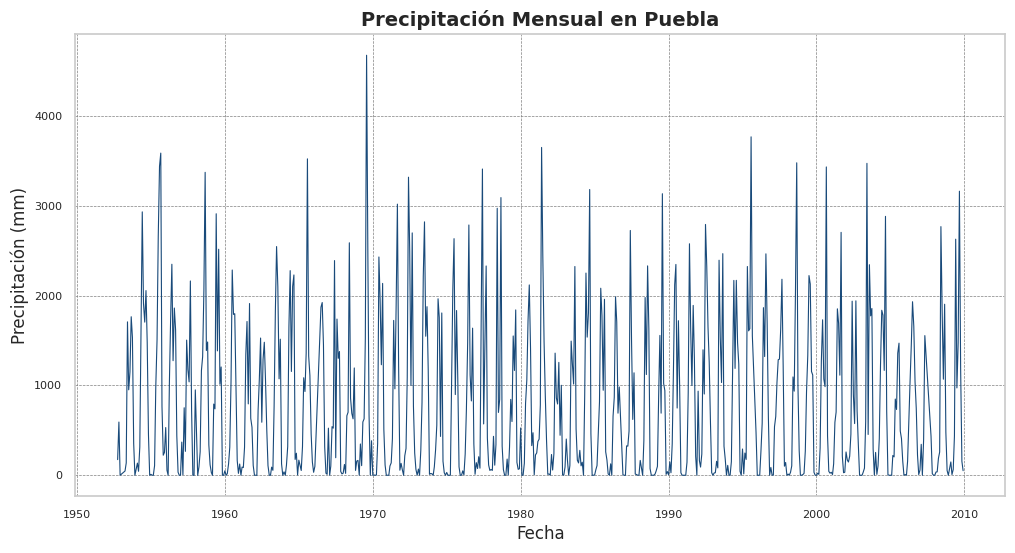

In [86]:
plt.figure()
plt.plot(pre, linewidth=0.8)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Mensual en Puebla")
plt.savefig('imagenes/01-precipitacion.svg', bbox_inches='tight')
plt.show()

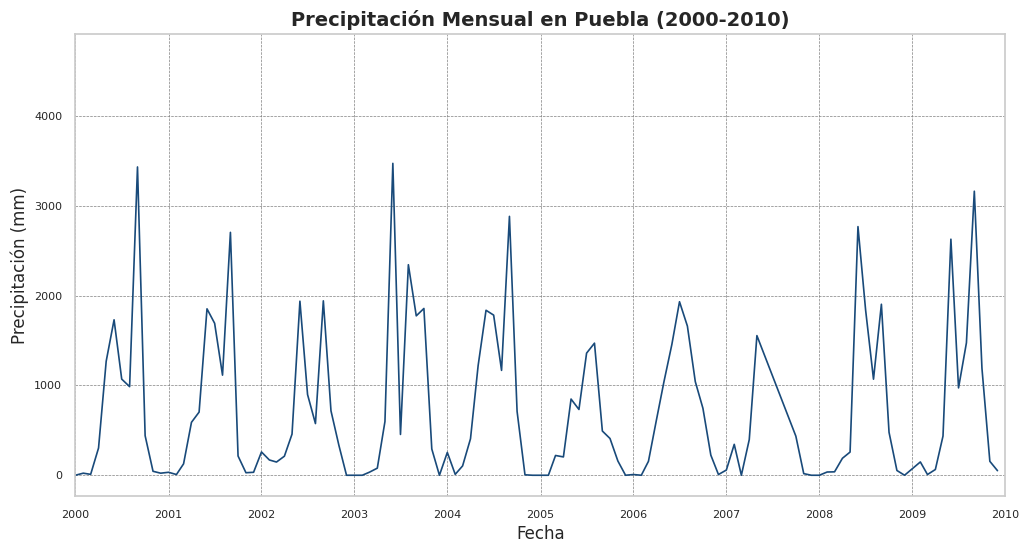

In [87]:
plt.figure()
plt.plot(pre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Mensual en Puebla (2000-2010)")
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2010-01-01')) 
plt.savefig('imagenes/01-2-precipitacion.svg', bbox_inches='tight')
plt.show()

# **TRANSFORMACIÓN**

Definición **matemática** de la **transformación Yeo-Johnson**, como se encuentra en la literatura estadística (propuesta por Ingram Olkin y I. Paul Yeo & R. J. Johnson en 2000).

Sea $x \in \mathbb{R}$ un valor (puede ser negativo, cero o positivo). La transformación $T(x; \lambda)$ se define como:

$$
T(x; \lambda) =
\begin{cases}
\frac{[(x + 1)^\lambda - 1]}{\lambda} & \text{si } x \geq 0, \, \lambda \ne 0 \\
\log(x + 1) & \text{si } x \geq 0, \, \lambda = 0 \\
-\frac{[(-x + 1)^{2 - \lambda} - 1]}{2 - \lambda} & \text{si } x < 0, \, \lambda \ne 2 \\
-\log(-x + 1) & \text{si } x < 0, \, \lambda = 2
\end{cases}
$$

La **corrección de sesgo** en la transformación Yeo-Johnson es un detalle técnico importante cuando se usa con la opción `standardize=True` en `scikit-learn` y otras implementaciones.

Cuando transformás datos para que se parezcan a una distribución normal, podés terminar con una media y varianza que no están exactamente en 0 y 1. La **corrección de sesgo** es una **estandarización posterior** que asegura que los datos transformados tengan:

- media 0
- desviación estándar 1

Esto **no forma parte de la transformación Yeo-Johnson en sí**, sino que es un **post-procesamiento** adicional. Pero es importante cuando vas a usar modelos sensibles a escalas.

Supongamos que $T(x_i; \lambda)$ es el valor transformado de $x_i$. Entonces, la corrección de sesgo se hace con una estandarización clásica:

$$
z_i = \frac{T(x_i; \lambda) - \mu_T}{\sigma_T}
$$

donde:

- $\mu_T = \frac{1}{n} \sum_{i=1}^{n} T(x_i; \lambda)$ es la **media** de los datos transformados
- $\sigma_T = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (T(x_i; \lambda) - \mu_T)^2}$ es la **desviación estándar**

In [88]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

In [89]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)   # Crear y ajustar el transformador Yeo-Johnson
ypre = pt.fit_transform(pre.values.reshape(-1, 1))

In [90]:
print("Lambda estimado:", pt.lambdas_)  # Obtener el valor lambda estimado

Lambda estimado: [0.23801569]


In [91]:
# Supongo que ya tienes tu variable 'pre' como una Serie de pandas o array 1D
X = pre.values.reshape(-1, 1)

# Ajuste original para obtener lambda estimado
pt = PowerTransformer(method='yeo-johnson', standardize=True)
ypre = pt.fit_transform(X)
lambda_est = pt.lambdas_[0]

# Bootstrap para el IC de lambda
n_boot = 1000
lambdas_boot = []

for _ in range(n_boot):
    sample = np.random.choice(X.flatten(), size=len(X), replace=True).reshape(-1, 1)
    pt_boot = PowerTransformer(method='yeo-johnson', standardize=True)
    pt_boot.fit(sample)
    lambdas_boot.append(pt_boot.lambdas_[0])

# Calcular percentiles para el intervalo de confianza al 95%
ci_lower = np.percentile(lambdas_boot, 2.5)
ci_upper = np.percentile(lambdas_boot, 97.5)

print(f"Estimación de λ: {lambda_est:.4f}")
print(f"IC 95% para λ: ({ci_lower:.4f}, {ci_upper:.4f})")


Estimación de λ: 0.2380
IC 95% para λ: (0.2074, 0.2701)


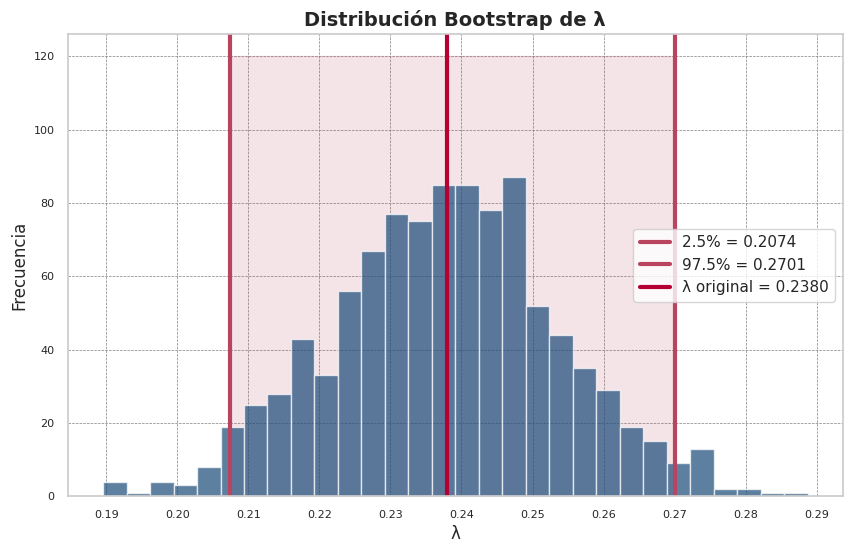

In [92]:
# Gráfico opcional del histograma de los λ bootstrap
plt.figure(figsize=(10, 6))
plt.fill_betweenx([0, 120], ci_lower, ci_upper, color=sns.color_palette()[4], alpha=0.15)
plt.hist(lambdas_boot, bins=30, alpha=0.7, edgecolor='white')
plt.axvline(ci_lower, label=f'2.5% = {ci_lower:.4f}', color=sns.color_palette()[4], linewidth=3)
plt.axvline(ci_upper, label=f'97.5% = {ci_upper:.4f}', color=sns.color_palette()[4], linewidth=3)
plt.axvline(lambda_est, label=f'λ original = {lambda_est:.4f}', color=sns.color_palette()[1], linewidth=3)
plt.title('Distribución Bootstrap de λ')
plt.xlabel('λ')
plt.ylabel('Frecuencia')
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.01))
plt.savefig('imagenes/02-lambda-yj-bootstrapping.svg', bbox_inches='tight')
plt.show()

se usa un lambda de 0.23  
depende de compu

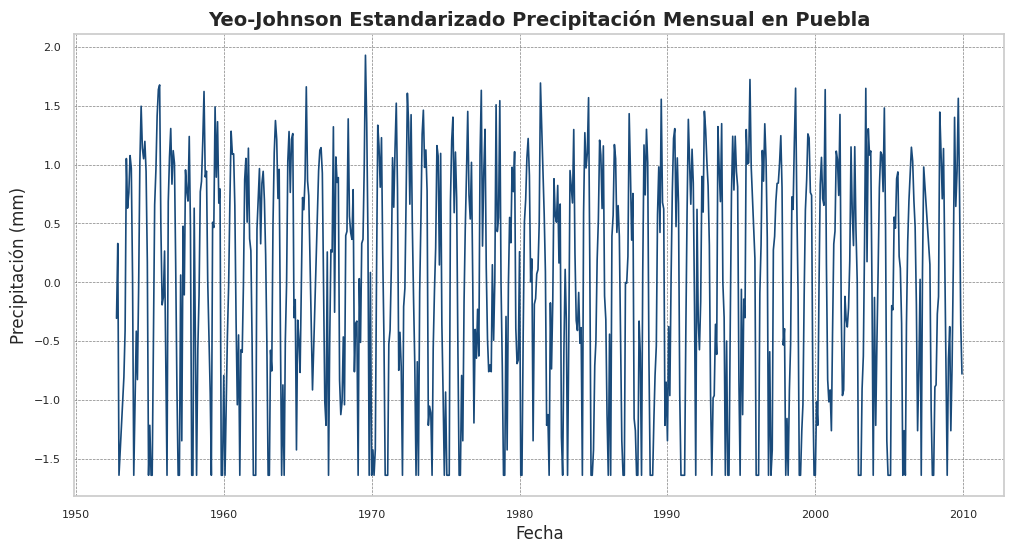

In [93]:
plt.figure()
plt.plot(date, ypre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Yeo-Johnson Estandarizado Precipitación Mensual en Puebla")
plt.savefig('imagenes/03-precipitacion_yeo_johnson.svg', bbox_inches='tight')
plt.show()

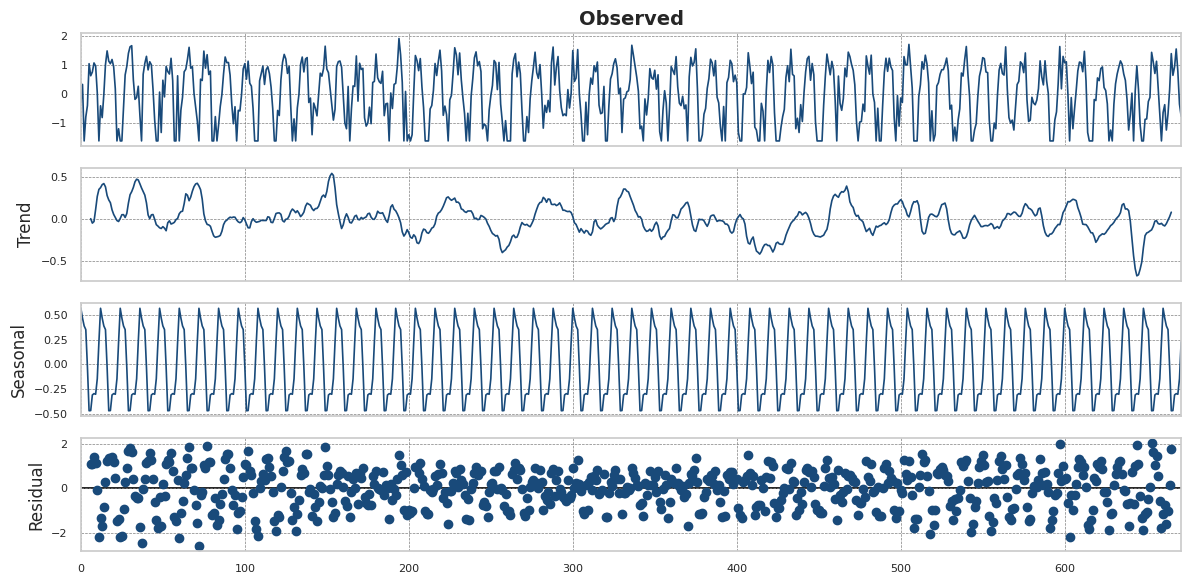

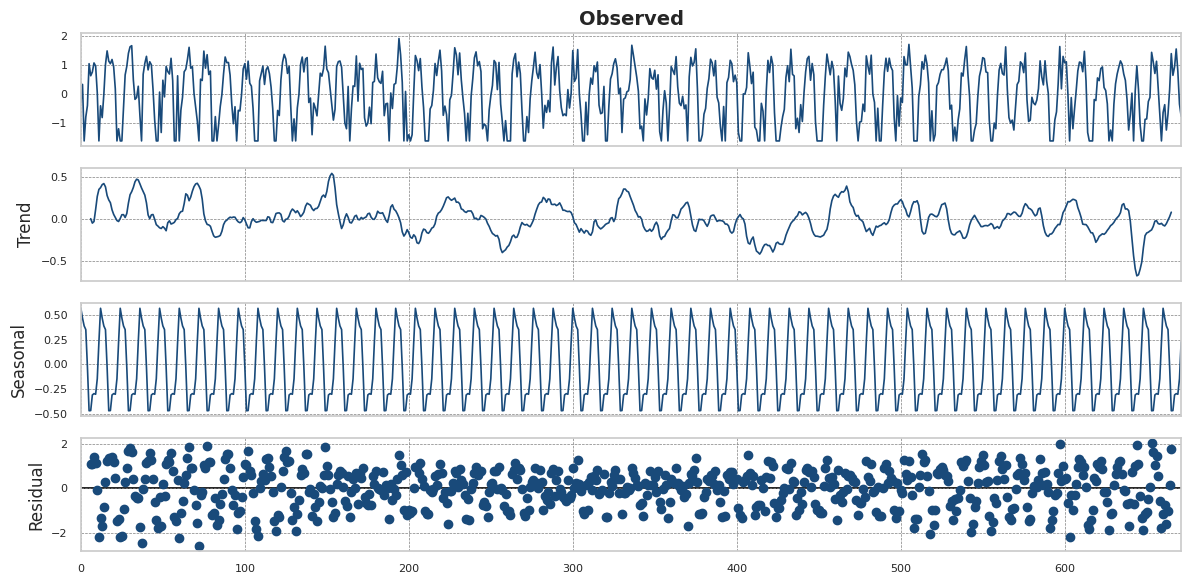

In [94]:
# Identificar estacionalidad
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición estacional
result = seasonal_decompose(ypre, model='additive', period=12)  # Cambia 'period' según la frecuencia de tus datos
result.plot()

# **ESTACIONARIEDAD**

In [95]:
from statsmodels.tsa.stattools import adfuller  

In [96]:
adfuller(ypre)

(np.float64(-7.092601622125712),
 np.float64(4.370937974226262e-10),
 17,
 654,
 {'1%': np.float64(-3.440388459298194),
  '5%': np.float64(-2.8659694611921034),
  '10%': np.float64(-2.569128861019929)},
 np.float64(1158.2583743431305))

In [97]:
estacionariedad = adfuller(ypre)

if estacionariedad[1] < 0.05:
    print("La serie es estacionaria", estacionariedad[1])

La serie es estacionaria 4.370937974226262e-10


## **AUTOCORRELACIONES**

In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
import matplotlib.pyplot as plt
from fac_y_facps_significativas import *    # Este es el archivo que se usa para el curso

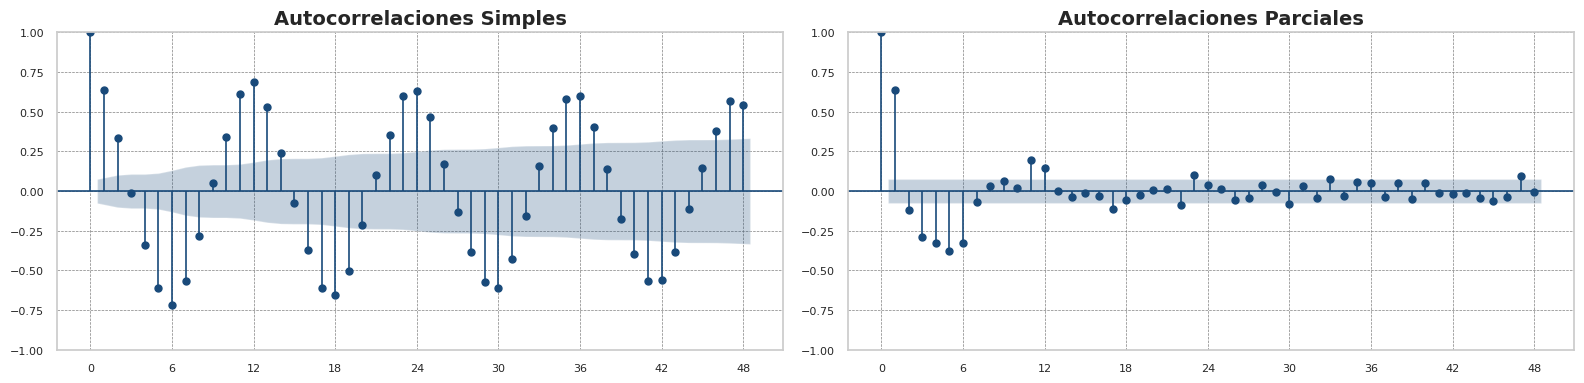

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(ypre, lags=48, ax=axs[0])
axs[0].xaxis.set_major_locator(plt.MultipleLocator(6))

# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(ypre, lags=48, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')
axs[1].xaxis.set_major_locator(plt.MultipleLocator(6))

plt.tight_layout()
plt.savefig('imagenes/04-acf_pacf.svg', bbox_inches='tight')
plt.show()


In [100]:
fac = FAC(len(ypre), acf(ypre, nlags=24)[1:] )

Valores de autocorrelacion significativos:
r1: 0.6342847387425631
r2: 0.3322009206680224
r4: -0.3386012667475899
r5: -0.6115854475702547
r6: -0.7190648308075895
r7: -0.5691325786877741
r8: -0.2839363213168529
r10: 0.3412293944327521
r11: 0.613088008640551
r12: 0.6874989600822965
r13: 0.5275914269967102
r14: 0.24147272918399632
r16: -0.3719149280712862
r17: -0.6128107061643207
r18: -0.6535427016550233
r19: -0.5005469564429801
r22: 0.3535761456770601
r23: 0.5989723862319
r24: 0.6278045317141531


In [101]:
facp = FACP(len(ypre), pacf(ypre, nlags=24)[1:])

Valores de autocorrelacion parcial significativos:
rho 1: 0.6352300215126712
rho 2: -0.11789881064955397
rho 3: -0.29409422369935306
rho 4: -0.3284863556530342
rho 5: -0.3857613954555211
rho 6: -0.3320625526317802
rho 11: 0.20313139379301662
rho 12: 0.1562940716613224
rho 17: -0.12206771400339961
rho 22: -0.08796950273764118
rho 23: 0.1090512634071366


# **MODELADO**

In [102]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

ARIMA(2,0,3)(1,0,1)[12], AIC=1200.512  
ARIMA(3,0,2)(1,0,1)[12], AIC=1200.744  
ARIMA(2,0,4)(1,0,1)[12], AIC=1202.477  
ARIMA(2,0,3)(1,0,2)[12], AIC=1202.484  
ARIMA(2,0,3)(2,0,1)[12], AIC=1202.486  
ARIMA(3,0,3)(1,0,1)[12], AIC=1203.281  
ARIMA(2,0,2)(1,0,1)[12], AIC=1203.823  
ARIMA(2,0,3)(2,0,2)[12], AIC=1204.463  
ARIMA(3,0,4)(1,0,1)[12], AIC=1204.511  
ARIMA(2,0,3)(1,0,0)[12], AIC=1205.567  
ARIMA(2,0,3)(0,0,1)[12], AIC=1205.983  
ARIMA(2,0,3)(2,0,0)[12], AIC=1206.378  
ARIMA(2,0,3)(0,0,2)[12], AIC=1207.179  
ARIMA(2,0,3)(1,0,0)[12], AIC=1207.567  
ARIMA(2,0,3)(0,0,1)[12], AIC=1207.983  
ARIMA(2,0,3)(2,0,0)[12], AIC=1208.378  
ARIMA(2,0,3)(0,0,0)[12], AIC=1209.165  
ARIMA(2,0,3)(0,0,2)[12], AIC=1209.179  
ARIMA(2,0,4)(1,0,0)[12], AIC=1209.398  
ARIMA(3,0,3)(1,0,0)[12], AIC=1210.214  
ARIMA(2,0,3)(0,0,0)[12], AIC=1211.165  
ARIMA(3,0,4)(1,0,0)[12], AIC=1211.408  
ARIMA(2,0,3)(1,0,1)[12], AIC=1214.311  
ARIMA(2,0,3)(2,0,1)[12], AIC=1221.204  
ARIMA(1,0,4)(1,0,1)[12], AIC=1289.599  
ARIMA(1,0,3)(1,0,1)[12], AIC=1296.044  
ARIMA(2,0,2)(2,0,1)[12], AIC=1301.569  
ARIMA(2,0,2)(1,0,2)[12], AIC=1308.530  
ARIMA(2,0,2)(1,0,1)[12], AIC=1311.963  
ARIMA(2,0,2)(2,0,2)[12], AIC=1314.797  
ARIMA(2,0,1)(2,0,1)[12], AIC=1318.488  
ARIMA(2,0,2)(2,0,0)[12], AIC=1322.064  
ARIMA(3,0,2)(1,0,0)[12], AIC=1326.643  
ARIMA(1,0,2)(2,0,1)[12], AIC=1334.931  
ARIMA(3,0,2)(2,0,1)[12], AIC=1339.323  
ARIMA(2,0,2)(1,0,0)[12], AIC=1349.481  
ARIMA(1,0,4)(1,0,0)[12], AIC=1366.547  
ARIMA(1,0,3)(1,0,0)[12], AIC=1376.094  
ARIMA(1,0,0)(1,0,0)[12], AIC=1407.341  
ARIMA(1,0,2)(1,0,0)[12], AIC=1411.187  
ARIMA(2,0,2)(0,0,1)[12], AIC=1417.826  
ARIMA(0,0,1)(0,0,1)[12], AIC=1529.166  
ARIMA(0,0,0)(0,0,0)[12], AIC=1909.053  
ARIMA(0,0,0)(0,0,0)[12], AIC=1911.053  

In [103]:
# import pmdarima as pm

In [104]:
# # Encontrar el mejor SARIMA, Basado en ul AIC 
# auto_sarima_model = pm.auto_arima(ypre, 
#                                   seasonal=True, 
#                                   m=12,  # Monthly data, so seasonality is 12
#                                   stepwise=True, 
#                                   suppress_warnings=True, 
#                                   trace=True)

# **Encontrando un Modelo que sea Estacionario e Invertible**

In [165]:
from modulo_raices import * # Una funcion que hice para verificar si los parametros son estacionarios e invertibles

## **Modelo con mejor AIC**

In [106]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [1], 12)   Log Likelihood                -592.256
Date:                              Thu, 24 Apr 2025   AIC                           1200.512
Time:                                      15:30:42   BIC                           1236.594
Sample:                                           0   HQIC                          1214.486
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7104      0.008    203.239      0.000       1.694       1.727
ar.L2         -0.9855      0.009   -115.453      0.000      -1.002      -0.969
ma.L1         -1.4789      0.034    -43.322      0.000      -1.546      -1.412
ma.L2          0.7053      0.058     12.183      0.000       0.592       0.819
ma.L3          0.0654      0.037      1.776      0.076      -0.007       0.138
ar.S.L12       0.8781      0.089      9.875      0.000       0.704       1.052
ma.S.L12      -0.8070      0.108     -7.464      0.000      -1.019      -0.595
sigma2         0.3391      0.017     19.859      0.000       0.306       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.71
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [162]:
alpha = 0.10

In [164]:
if np.any(modelo.pvalues > alpha):
    print("Hay coeficientes no significativos, no se cumple el principio de parsimonia")
else:
    print(":)")

:)


In [167]:
def parsimonia():
    if np.any(modelo.pvalues > alpha):
        print("Hay coeficientes no significativos, no se cumple el principio de parsimonia")
    else:
        print(":)")

In [107]:
# Verificamos estacianariedad (los parametros AR se ponen con *-1)
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.13999905+0.j         -0.94913078+0.61447189j -0.94913078-0.61447189j
 -0.45160125+1.00423108j -0.45160125-1.00423108j  0.15341033+1.03336803j
  0.15341033-1.03336803j  0.60127671+0.72420125j  0.60127671-0.72420125j
  0.90329376+0.j          0.76439765+0.39186877j  0.76439765-0.39186877j]

Módulo de las raíces: [1.13999905 1.13067456 1.13067456 1.10110116 1.10110116 1.04469336
 1.04469336 0.94127633 0.94127633 0.90329376 0.85899063 0.85899063]

¿Las raíces están fuera del circulo unitario?  False



$$
\text{SARIMA}(2,0,3) \times (1,0,1)_{12}
$$

con los coeficientes:

- AR(1): $\phi_1 = -1.7104$
- AR(2): $\phi_2 = 0.9855$
- MA(1): $\theta_1 = -1.4789$
- MA(2): $\theta_2 = 0.7053$
- MA(3): $\theta_3 = 0.0654$
- AR(12): $\Phi_1 = -0.8782$
- MA(12): $\Theta_1 = -0.8071$
$$
(1
- 1.7104 \, B 
+ 0.9855 \, B^2 
- 0.8782 \, B^{12})W_t=
(1
- 1.4789 \, B 
+ 0.7053 \, B^2 
+ 0.0654 \, B^3
- 0.8071 \, B^{12})\varepsilon_{t}
$$

$W_t = T(X_t)$ con la transformación de Yeo-Johnson y $\varepsilon_t \sim \mathcal{N}(0, 1)$

## **2° Modelo con mejor AIC**

In [108]:
modelo=SARIMAX(ypre,
               order=(3,0,2),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(3, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -592.456
Date:                              Thu, 24 Apr 2025   AIC                           1200.912
Time:                                      15:30:45   BIC                           1236.994
Sample:                                           0   HQIC                          1214.886
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7808      0.048     36.753      0.000       1.686       1.876
ar.L2         -1.1077      0.080    -13.788      0.000      -1.265      -0.950
ar.L3          0.0723      0.045      1.618      0.106      -0.015       0.160
ma.L1         -1.5497      0.032    -48.112      0.000      -1.613      -1.487
ma.L2          0.8196      0.031     26.545      0.000       0.759       0.880
ar.S.L12       0.9016      0.074     12.141      0.000       0.756       1.047
ma.S.L12      -0.8374      0.093     -9.017      0.000      -1.019      -0.655
sigma2         0.3399      0.017     19.830      0.000       0.306       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.54
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
parsimonia()

:)


In [109]:
# Verificamos estacianariedad (los parametros AR se ponen con *-1)
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p3=-modelo.params[2], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.1455043 +0.j         -0.95007199+0.62042858j -0.95007199-0.62042858j
 -0.44518383+1.00729677j -0.44518383-1.00729677j  0.1591763 +1.028072j
  0.1591763 -1.028072j    0.59886647+0.71795083j  0.59886647-0.71795083j
  0.89610399+0.j          0.7619132 +0.38851343j  0.7619132 -0.38851343j]

Módulo de las raíces: [1.1455043  1.13471072 1.13471072 1.10128808 1.10128808 1.04032165
 1.04032165 0.93493018 0.93493018 0.89610399 0.85525108 0.85525108]

¿Las raíces están fuera del circulo unitario?  False


## **3° Modelo con mejor AIC**

In [110]:
modelo=SARIMAX(ypre,
               order=(2,0,4),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(2, 0, 4)x(1, 0, [1], 12)   Log Likelihood                -592.238
Date:                              Thu, 24 Apr 2025   AIC                           1202.477
Time:                                      15:30:49   BIC                           1243.069
Sample:                                           0   HQIC                          1218.198
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7101      0.008    201.410      0.000       1.693       1.727
ar.L2         -0.9853      0.009   -114.388      0.000      -1.002      -0.968
ma.L1         -1.4791      0.034    -42.950      0.000      -1.547      -1.412
ma.L2          0.7005      0.071      9.887      0.000       0.562       0.839
ma.L3          0.0755      0.079      0.950      0.342      -0.080       0.231
ma.L4         -0.0075      0.044     -0.171      0.864      -0.094       0.079
ar.S.L12       0.8810      0.088      9.972      0.000       0.708       1.054
ma.S.L12      -0.8117      0.109     -7.475      0.000      -1.025      -0.599
sigma2         0.3391      0.017     19.731      0.000       0.305       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.62
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

No cumple el principio de Parsimonia

## **4° Modelo con mejor AIC**

In [112]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(1,0,2,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [1, 2], 12)   Log Likelihood                -592.242
Date:                                 Thu, 24 Apr 2025   AIC                           1202.484
Time:                                         15:30:54   BIC                           1243.076
Sample:                                              0   HQIC                          1218.204
                                                 - 672                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7107      0.008    205.857      0.000       1.694       1.727
ar.L2         -0.9858      0.008   -116.287      0.000      -1.002      -0.969
ma.L1         -1.4788      0.034    -43.349      0.000      -1.546      -1.412
ma.L2          0.7042      0.058     12.116      0.000       0.590       0.818
ma.L3          0.0670      0.037      1.797      0.072      -0.006       0.140
ar.S.L12       0.8867      0.098      9.081      0.000       0.695       1.078
ma.S.L12      -0.8108      0.107     -7.545      0.000      -1.021      -0.600
ma.S.L24      -0.0086      0.046     -0.188      0.851      -0.099       0.081
sigma2         0.3391      0.017     19.810      0.000       0.306       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.84
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

No cumple el principio de Parsimonia

## **5° Modelo con mejor AIC**

In [114]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(2,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(2, 0, [1], 12)   Log Likelihood                -592.243
Date:                              Thu, 24 Apr 2025   AIC                           1202.486
Time:                                      15:30:59   BIC                           1243.078
Sample:                                           0   HQIC                          1218.207
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7106      0.008    205.456      0.000       1.694       1.727
ar.L2         -0.9858      0.008   -116.067      0.000      -1.002      -0.969
ma.L1         -1.4788      0.034    -43.345      0.000      -1.546      -1.412
ma.L2          0.7044      0.058     12.119      0.000       0.590       0.818
ma.L3          0.0668      0.037      1.792      0.073      -0.006       0.140
ar.S.L12       0.8961      0.134      6.703      0.000       0.634       1.158
ar.S.L24      -0.0086      0.050     -0.173      0.863      -0.107       0.089
ma.S.L12      -0.8206      0.130     -6.312      0.000      -1.075      -0.566
sigma2         0.3390      0.017     19.812      0.000       0.305       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.83
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

No cumple el principio de Parsimonia

## **6° Modelo con mejor AIC**

In [170]:
modelo=SARIMAX(ypre,
               order=(3,0,3),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(3, 0, 3)x(1, 0, [1], 12)   Log Likelihood                -592.644
Date:                              Thu, 24 Apr 2025   AIC                           1203.287
Time:                                      15:42:57   BIC                           1243.880
Sample:                                           0   HQIC                          1219.008
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.355      2.816      0.005       0.304       1.695
ar.L2          0.2268      0.604      0.376      0.707      -0.957       1.410
ar.L3         -0.6960      0.346     -2.010      0.044      -1.375      -0.017
ma.L1         -0.7869      0.344     -2.290      0.022      -1.460      -0.114
ma.L2         -0.3361      0.509     -0.660      0.509      -1.334       0.662
ma.L3          0.6013      0.261      2.300      0.021       0.089       1.114
ar.S.L12       0.8875      0.082     10.882      0.000       0.728       1.047
ma.S.L12      -0.8181      0.101     -8.112      0.000      -1.016      -0.620
sigma2         0.3394      0.017     19.824      0.000       0.306       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                13.19
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.24
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
parsimonia()

Hay coeficientes no significativos, no se cumple el principio de parsimonia


## **7° Modelo con mejor AIC**

In [173]:
modelo=SARIMAX(ypre,
               order=(2,0,2),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -594.618
Date:                              Thu, 24 Apr 2025   AIC                           1203.236
Time:                                      15:43:39   BIC                           1234.808
Sample:                                           0   HQIC                          1215.463
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6961      0.012    146.606      0.000       1.673       1.719
ar.L2         -0.9707      0.012    -83.870      0.000      -0.993      -0.948
ma.L1         -1.5185      0.027    -57.171      0.000      -1.571      -1.466
ma.L2          0.8003      0.028     28.680      0.000       0.746       0.855
ar.S.L12       0.8933      0.064     13.883      0.000       0.767       1.019
ma.S.L12      -0.8023      0.084     -9.534      0.000      -0.967      -0.637
sigma2         0.3416      0.017     19.885      0.000       0.308       0.375
===================================================================================
Ljung-Box (L1) (Q):                   2.01   Jarque-Bera (JB):                15.11
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.28
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [174]:
parsimonia()

:)


In [118]:
# Verificamos estacianariedad (los parametros AR se ponen con *-1)
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[4])

Raíces del polinomio característico: [-1.13733152+0.j         -0.94708913+0.61276389j -0.94708913-0.61276389j
 -0.45119945+1.00161083j -0.45119945-1.00161083j  0.15179376+1.03125106j
  0.15179376-1.03125106j  0.59865836+0.72485731j  0.59865836-0.72485731j
  0.90222474+0.j          0.76538984+0.3924017j   0.76538984-0.3924017j ]

Módulo de las raíces: [1.13733152 1.12803254 1.12803254 1.09854685 1.09854685 1.04236274
 1.04236274 0.94011167 0.94011167 0.90222474 0.86011668 0.86011668]

¿Las raíces están fuera del circulo unitario?  False


## **8° Modelo con mejor AIC**

In [119]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(2,0,2,12)).fit()

modelo.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(2, 0, [1, 2], 12)   Log Likelihood                -592.237
Date:                                 Thu, 24 Apr 2025   AIC                           1204.475
Time:                                         15:31:12   BIC                           1249.577
Sample:                                              0   HQIC                          1221.942
                                                 - 672                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7100      0.008    201.416      0.000       1.693       1.727
ar.L2         -0.9850      0.009   -113.367      0.000      -1.002      -0.968
ma.L1         -1.4780      0.034    -43.273      0.000      -1.545      -1.411
ma.L2          0.7035      0.058     12.107      0.000       0.590       0.817
ma.L3          0.0658      0.037      1.763      0.078      -0.007       0.139
ar.S.L12       0.8004      3.165      0.253      0.800      -5.402       7.003
ar.S.L24       0.0838      2.788      0.030      0.976      -5.382       5.549
ma.S.L12      -0.7225      3.158     -0.229      0.819      -6.913       5.468
ma.S.L24      -0.0911      2.561     -0.036      0.972      -5.110       4.928
sigma2         0.3389      0.017     19.795      0.000       0.305       0.372
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.91
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **9° Modelo con mejor AIC**

In [120]:
modelo=SARIMAX(ypre,
               order=(3,0,4),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(3, 0, 4)x(1, 0, [1], 12)   Log Likelihood                -592.256
Date:                              Thu, 24 Apr 2025   AIC                           1204.511
Time:                                      15:31:15   BIC                           1249.614
Sample:                                           0   HQIC                          1221.979
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1558     18.500      0.062      0.950     -35.103      37.414
ar.L2         -0.0369     31.642     -0.001      0.999     -62.054      61.980
ar.L3         -0.5466     18.231     -0.030      0.976     -36.280      35.186
ma.L1         -0.9242     18.500     -0.050      0.960     -37.184      35.336
ma.L2         -0.1141     27.378     -0.004      0.997     -53.773      53.545
ma.L3          0.4548     13.081      0.035      0.972     -25.183      26.093
ma.L4          0.0376      1.192      0.032      0.975      -2.299       2.374
ar.S.L12       0.8778      0.089      9.809      0.000       0.702       1.053
ma.S.L12      -0.8065      0.110     -7.357      0.000      -1.021      -0.592
sigma2         0.3391      0.017     19.828      0.000       0.306       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.71
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **10° Modelo con mejor AIC**

In [160]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(1,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [], 12)   Log Likelihood                -595.784
Date:                             Thu, 24 Apr 2025   AIC                           1205.567
Time:                                     15:36:25   BIC                           1237.139
Sample:                                          0   HQIC                          1217.795
                                             - 672                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7167      0.005    324.218      0.000       1.706       1.727
ar.L2         -0.9917      0.006   -177.911      0.000      -1.003      -0.981
ma.L1         -1.4754      0.034    -43.640      0.000      -1.542      -1.409
ma.L2          0.6793      0.057     11.817      0.000       0.567       0.792
ma.L3          0.0944      0.036      2.605      0.009       0.023       0.165
ar.S.L12       0.0948      0.039      2.416      0.016       0.018       0.172
sigma2         0.3429      0.017     19.744      0.000       0.309       0.377
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.22
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

In [161]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.39938942+0.j         -1.16049648+0.76130013j -1.16049648-0.76130013j
 -0.53748571+1.23998065j -0.53748571-1.23998065j  0.22145644+1.26177124j
  0.22145644-1.26177124j  0.78019016+0.82413217j  0.78019016-0.82413217j
  1.10494754+0.j          0.84355654+0.45407024j  0.84355654-0.45407024j]

Módulo de las raíces: [1.39938942 1.3879229  1.3879229  1.35145954 1.35145954 1.281058
 1.281058   1.13485264 1.13485264 1.10494754 0.95800178 0.95800178]

¿Las raíces están fuera del circulo unitario?  False


## **11° Modelo con mejor AIC**

In [ ]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(0,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [], 12)   Log Likelihood                -595.784
Date:                             Thu, 24 Apr 2025   AIC                           1205.567
Time:                                     15:36:25   BIC                           1237.139
Sample:                                          0   HQIC                          1217.795
                                             - 672                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7167      0.005    324.218      0.000       1.706       1.727
ar.L2         -0.9917      0.006   -177.911      0.000      -1.003      -0.981
ma.L1         -1.4754      0.034    -43.640      0.000      -1.542      -1.409
ma.L2          0.6793      0.057     11.817      0.000       0.567       0.792
ma.L3          0.0944      0.036      2.605      0.009       0.023       0.165
ar.S.L12       0.0948      0.039      2.416      0.016       0.018       0.172
sigma2         0.3429      0.017     19.744      0.000       0.309       0.377
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.22
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

In [ ]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.39938942+0.j         -1.16049648+0.76130013j -1.16049648-0.76130013j
 -0.53748571+1.23998065j -0.53748571-1.23998065j  0.22145644+1.26177124j
  0.22145644-1.26177124j  0.78019016+0.82413217j  0.78019016-0.82413217j
  1.10494754+0.j          0.84355654+0.45407024j  0.84355654-0.45407024j]

Módulo de las raíces: [1.39938942 1.3879229  1.3879229  1.35145954 1.35145954 1.281058
 1.281058   1.13485264 1.13485264 1.10494754 0.95800178 0.95800178]

¿Las raíces están fuera del circulo unitario?  False


## **11° Modelo con mejor AIC**

In [ ]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(2,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [], 12)   Log Likelihood                -595.784
Date:                             Thu, 24 Apr 2025   AIC                           1205.567
Time:                                     15:36:25   BIC                           1237.139
Sample:                                          0   HQIC                          1217.795
                                             - 672                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7167      0.005    324.218      0.000       1.706       1.727
ar.L2         -0.9917      0.006   -177.911      0.000      -1.003      -0.981
ma.L1         -1.4754      0.034    -43.640      0.000      -1.542      -1.409
ma.L2          0.6793      0.057     11.817      0.000       0.567       0.792
ma.L3          0.0944      0.036      2.605      0.009       0.023       0.165
ar.S.L12       0.0948      0.039      2.416      0.016       0.018       0.172
sigma2         0.3429      0.017     19.744      0.000       0.309       0.377
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.22
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

In [ ]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.39938942+0.j         -1.16049648+0.76130013j -1.16049648-0.76130013j
 -0.53748571+1.23998065j -0.53748571-1.23998065j  0.22145644+1.26177124j
  0.22145644-1.26177124j  0.78019016+0.82413217j  0.78019016-0.82413217j
  1.10494754+0.j          0.84355654+0.45407024j  0.84355654-0.45407024j]

Módulo de las raíces: [1.39938942 1.3879229  1.3879229  1.35145954 1.35145954 1.281058
 1.281058   1.13485264 1.13485264 1.10494754 0.95800178 0.95800178]

¿Las raíces están fuera del circulo unitario?  False


## **12° Modelo con mejor AIC**

In [ ]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(2,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [], 12)   Log Likelihood                -595.784
Date:                             Thu, 24 Apr 2025   AIC                           1205.567
Time:                                     15:36:25   BIC                           1237.139
Sample:                                          0   HQIC                          1217.795
                                             - 672                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7167      0.005    324.218      0.000       1.706       1.727
ar.L2         -0.9917      0.006   -177.911      0.000      -1.003      -0.981
ma.L1         -1.4754      0.034    -43.640      0.000      -1.542      -1.409
ma.L2          0.6793      0.057     11.817      0.000       0.567       0.792
ma.L3          0.0944      0.036      2.605      0.009       0.023       0.165
ar.S.L12       0.0948      0.039      2.416      0.016       0.018       0.172
sigma2         0.3429      0.017     19.744      0.000       0.309       0.377
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.22
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

In [ ]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.39938942+0.j         -1.16049648+0.76130013j -1.16049648-0.76130013j
 -0.53748571+1.23998065j -0.53748571-1.23998065j  0.22145644+1.26177124j
  0.22145644-1.26177124j  0.78019016+0.82413217j  0.78019016-0.82413217j
  1.10494754+0.j          0.84355654+0.45407024j  0.84355654-0.45407024j]

Módulo de las raíces: [1.39938942 1.3879229  1.3879229  1.35145954 1.35145954 1.281058
 1.281058   1.13485264 1.13485264 1.10494754 0.95800178 0.95800178]

¿Las raíces están fuera del circulo unitario?  False


## **10° Modelo con mejor AIC**

In [ ]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(0,0,2,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [], 12)   Log Likelihood                -595.784
Date:                             Thu, 24 Apr 2025   AIC                           1205.567
Time:                                     15:36:25   BIC                           1237.139
Sample:                                          0   HQIC                          1217.795
                                             - 672                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7167      0.005    324.218      0.000       1.706       1.727
ar.L2         -0.9917      0.006   -177.911      0.000      -1.003      -0.981
ma.L1         -1.4754      0.034    -43.640      0.000      -1.542      -1.409
ma.L2          0.6793      0.057     11.817      0.000       0.567       0.792
ma.L3          0.0944      0.036      2.605      0.009       0.023       0.165
ar.S.L12       0.0948      0.039      2.416      0.016       0.018       0.172
sigma2         0.3429      0.017     19.744      0.000       0.309       0.377
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.22
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

In [ ]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.39938942+0.j         -1.16049648+0.76130013j -1.16049648-0.76130013j
 -0.53748571+1.23998065j -0.53748571-1.23998065j  0.22145644+1.26177124j
  0.22145644-1.26177124j  0.78019016+0.82413217j  0.78019016-0.82413217j
  1.10494754+0.j          0.84355654+0.45407024j  0.84355654-0.45407024j]

Módulo de las raíces: [1.39938942 1.3879229  1.3879229  1.35145954 1.35145954 1.281058
 1.281058   1.13485264 1.13485264 1.10494754 0.95800178 0.95800178]

¿Las raíces están fuera del circulo unitario?  False


## **10° Modelo con mejor AIC**

In [176]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(0,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -598.582
Date:                Thu, 24 Apr 2025   AIC                           1209.165
Time:                        15:53:30   BIC                           1236.227
Sample:                             0   HQIC                          1219.646
                                - 672                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7172      0.005    336.971      0.000       1.707       1.727
ar.L2         -0.9920      0.005   -184.716      0.000      -1.003      -0.981
ma.L1         -1.4724      0.034    -43.065      0.000      -1.539      -1.405
ma.L2          0.6803      0.058     11.760      0.000       0.567       0.794
ma.L3          0.0867      0.036      2.387      0.017       0.016       0.158
sigma2         0.3459      0.018     19.654      0.000       0.311       0.380
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.68
Prob(Q):                              0.95   Prob(JB):                         0.01
Heteroskedasticity (H):               0.91   Skew:                            -0.19
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

In [ ]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.39938942+0.j         -1.16049648+0.76130013j -1.16049648-0.76130013j
 -0.53748571+1.23998065j -0.53748571-1.23998065j  0.22145644+1.26177124j
  0.22145644-1.26177124j  0.78019016+0.82413217j  0.78019016-0.82413217j
  1.10494754+0.j          0.84355654+0.45407024j  0.84355654-0.45407024j]

Módulo de las raíces: [1.39938942 1.3879229  1.3879229  1.35145954 1.35145954 1.281058
 1.281058   1.13485264 1.13485264 1.10494754 0.95800178 0.95800178]

¿Las raíces están fuera del circulo unitario?  False


## **19° Modelo con mejor AIC**

In [177]:
modelo=SARIMAX(ypre,
               order=(2,0,4),
               seasonal_order=(1,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  672
Model:             SARIMAX(2, 0, 4)x(1, 0, [], 12)   Log Likelihood                -595.699
Date:                             Thu, 24 Apr 2025   AIC                           1207.398
Time:                                     15:54:04   BIC                           1243.480
Sample:                                          0   HQIC                          1221.372
                                             - 672                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7164      0.005    315.159      0.000       1.706       1.727
ar.L2         -0.9914      0.006   -173.573      0.000      -1.003      -0.980
ma.L1         -1.4770      0.034    -43.432      0.000      -1.544      -1.410
ma.L2          0.6698      0.069      9.727      0.000       0.535       0.805
ma.L3          0.1160      0.077      1.512      0.130      -0.034       0.266
ma.L4         -0.0163      0.043     -0.380      0.704      -0.101       0.068
ar.S.L12       0.0892      0.041      2.196      0.028       0.010       0.169
sigma2         0.3428      0.018     19.523      0.000       0.308       0.377
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.84
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.22
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
parsimonia()

In [ ]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p12=-modelo.params[5])

Raíces del polinomio característico: [-1.39938942+0.j         -1.16049648+0.76130013j -1.16049648-0.76130013j
 -0.53748571+1.23998065j -0.53748571-1.23998065j  0.22145644+1.26177124j
  0.22145644-1.26177124j  0.78019016+0.82413217j  0.78019016-0.82413217j
  1.10494754+0.j          0.84355654+0.45407024j  0.84355654-0.45407024j]

Módulo de las raíces: [1.39938942 1.3879229  1.3879229  1.35145954 1.35145954 1.281058
 1.281058   1.13485264 1.13485264 1.10494754 0.95800178 0.95800178]

¿Las raíces están fuera del circulo unitario?  False


## **20° Modelo con mejor AIC**

In [178]:
modelo=SARIMAX(ypre,
               order=(3,0,3),
               seasonal_order=(1,0,0,12)).fit()

modelo.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  672
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 12)   Log Likelihood                -595.332
Date:                             Thu, 24 Apr 2025   AIC                           1206.664
Time:                                     15:54:33   BIC                           1242.746
Sample:                                          0   HQIC                          1220.638
                                             - 672                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7633      0.029     26.351      0.000       0.707       0.820
ar.L2          0.6468      0.049     13.160      0.000       0.550       0.743
ar.L3         -0.9469      0.029    -33.031      0.000      -1.003      -0.891
ma.L1         -0.5747      0.029    -19.820      0.000      -0.631      -0.518
ma.L2         -0.7011      0.034    -20.741      0.000      -0.767      -0.635
ma.L3          0.8127      0.026     31.324      0.000       0.762       0.864
ar.S.L12       0.0926      0.039      2.344      0.019       0.015       0.170
sigma2         0.3416      0.017     19.911      0.000       0.308       0.375
===================================================================================
Ljung-Box (L1) (Q):                   2.33   Jarque-Bera (JB):                14.48
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.23
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [179]:
parsimonia()

:)


In [182]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1], p3=-modelo.params[2], p12=-modelo.params[6])

Raíces del polinomio característico: [-0.69739809+1.19841543j -0.69739809-1.19841543j -1.20760209+0.52017133j
 -1.20760209-0.52017133j -1.01657972+0.j          0.13682041+1.35647347j
  0.13682041-1.35647347j  0.82925262+0.91161268j  0.82925262-0.91161268j
  1.19419348+0.j          0.85012027+0.47505959j  0.85012027-0.47505959j]

Módulo de las raíces: [1.38656541 1.38656541 1.31486921 1.31486921 1.01657972 1.36335619
 1.36335619 1.23235449 1.23235449 1.19419348 0.97385116 0.97385116]

¿Las raíces están fuera del circulo unitario?  False


## **10° Modelo con mejor AIC**

In [183]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(0,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -598.582
Date:                Thu, 24 Apr 2025   AIC                           1209.165
Time:                        15:56:48   BIC                           1236.227
Sample:                             0   HQIC                          1219.646
                                - 672                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7172      0.005    336.971      0.000       1.707       1.727
ar.L2         -0.9920      0.005   -184.716      0.000      -1.003      -0.981
ma.L1         -1.4724      0.034    -43.065      0.000      -1.539      -1.405
ma.L2          0.6803      0.058     11.760      0.000       0.567       0.794
ma.L3          0.0867      0.036      2.387      0.017       0.016       0.158
sigma2         0.3459      0.018     19.654      0.000       0.311       0.380
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.68
Prob(Q):                              0.95   Prob(JB):                         0.01
Heteroskedasticity (H):               0.91   Skew:                            -0.19
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [184]:
parsimonia()

:)


In [185]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1])

Raíces del polinomio característico: [0.86549756+0.50889143j 0.86549756-0.50889143j]

Módulo de las raíces: [1.00402017 1.00402017]

¿Las raíces están fuera del circulo unitario?  True


In [187]:
modulo_raices_12(p1=modelo.params[2], p2=modelo.params[3], p3=modelo.params[4])

Raíces del polinomio característico: [-9.71900948+0.j          0.93501168+0.55933614j  0.93501168-0.55933614j]

Módulo de las raíces: [9.71900948 1.08954292 1.08954292]

¿Las raíces están fuera del circulo unitario?  True


Ljung-Box (L1) (Q):	0.00  
Prob(Q):	0.95

Independientes

Jarque-Bera (JB):	9.68  
Prob(JB):	0.01

No son normales :(

Heteroskedasticity (H):	0.91  
Prob(H) (two-sided):	0.48

Varianza constante

In [199]:
residuos=modelo.resid

In [200]:
from scipy.stats import ttest_1samp

ttest_1samp(residuos, 0)

TtestResult(statistic=np.float64(-0.05231777572324121), pvalue=np.float64(0.9582910608002932), df=np.int64(671))

Los residuos son cero

In [201]:
import numpy as np

# Supongamos que ya tenés tu array de residuos
# residuos = ...

# Calculamos la media y desviación estándar
media = np.mean(residuos)
std = np.std(residuos)

# Función para calcular porcentaje dentro de k desviaciones estándar
def porcentaje_dentro_k(residuos, k):
    dentro = np.abs(residuos - media) <= k * std
    return np.mean(dentro) * 100

# Cálculo para ±1σ, ±2σ, ±3σ
for k, ref in zip([1, 2, 3], [68, 95, 99.7]):
    pct = porcentaje_dentro_k(residuos, k)
    print(f"{pct:.2f}% de los residuos están dentro de ±{k}σ (esperado ≈ {ref}%)")


70.39% de los residuos están dentro de ±1σ (esperado ≈ 68%)
95.39% de los residuos están dentro de ±2σ (esperado ≈ 95%)
98.96% de los residuos están dentro de ±3σ (esperado ≈ 99.7%)


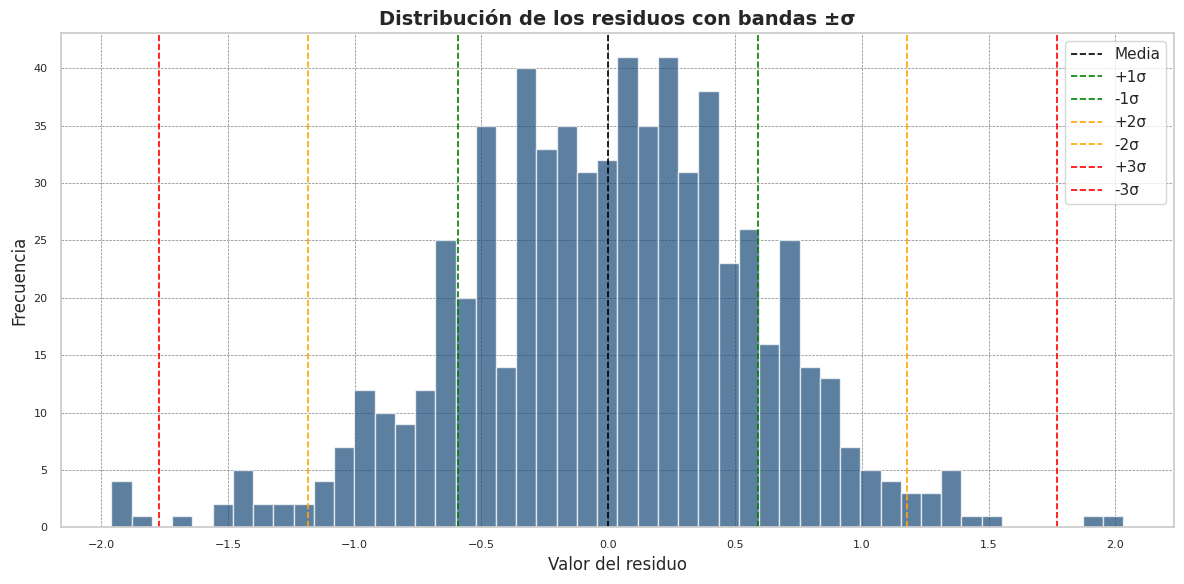

In [204]:

# Visualización
plt.figure()
plt.hist(residuos, bins=50, alpha=0.7,edgecolor='white')
plt.axvline(media, color='black', linestyle='--', label='Media')

# Líneas para ±1σ, ±2σ, ±3σ
for k, color in zip([1, 2, 3], ['green', 'orange', 'red']):
    plt.axvline(media + k * std, color=color, linestyle='--', label=f'+{k}σ')
    plt.axvline(media - k * std, color=color, linestyle='--', label=f'-{k}σ')

plt.title("Distribución de los residuos con bandas ±σ")
plt.xlabel("Valor del residuo")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Con diferencias

In [150]:
# primera diferencia
dypre = pd.Series(ypre.flatten()).diff().dropna()

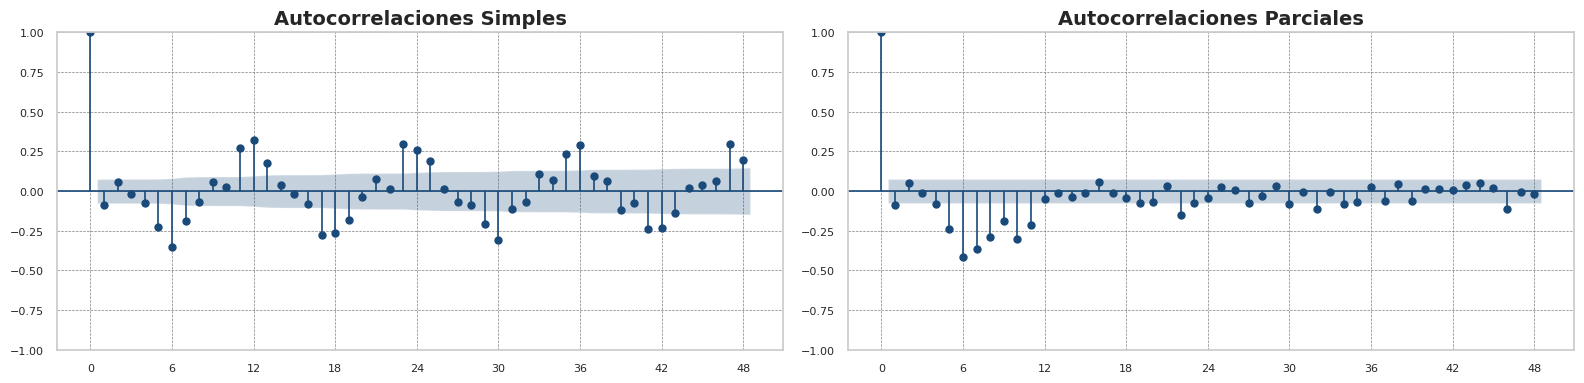

In [151]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(dypre, lags=48, ax=axs[0])
axs[0].xaxis.set_major_locator(plt.MultipleLocator(6))

# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(dypre, lags=48, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')
axs[1].xaxis.set_major_locator(plt.MultipleLocator(6))

plt.tight_layout()
plt.savefig('imagenes/04-acf_pacf.svg', bbox_inches='tight')
plt.show()


In [154]:
dypre

1      0.634376
2     -1.965939
3      0.832805
4      0.395305
5      1.458359
         ...   
667    0.294701
668    0.622096
669   -0.777233
670   -1.139507
671   -0.421366
Length: 671, dtype: float64

In [158]:
modelo=SARIMAX(dypre,
               order=(1,0,1),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  671
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -655.946
Date:                            Thu, 24 Apr 2025   AIC                           1321.891
Time:                                    15:34:56   BIC                           1344.435
Sample:                                         0   HQIC                          1330.623
                                            - 671                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3201      0.035      9.269      0.000       0.252       0.388
ma.L1         -0.9998      0.112     -8.891      0.000      -1.220      -0.779
ar.S.L12       0.9242      0.020     46.702      0.000       0.885       0.963
ma.S.L12      -0.6054      0.041    -14.756      0.000      -0.686      -0.525
sigma2         0.4066      0.047      8.579      0.000       0.314       0.499
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                21.59
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.41
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [159]:
modulo_raices_12(p1=-modelo.params[0], p12=-modelo.params[2])

Raíces del polinomio característico: [-1.03079714+0.j         -0.88505187+0.52384353j -0.88505187-0.52384353j
 -0.49275609+0.89476687j -0.49275609-0.89476687j  0.02652533+1.00976934j
  0.02652533-1.00976934j  0.52027404+0.84884962j  0.52027404-0.84884962j
  0.85857435+0.47612753j  0.85857435-0.47612753j  0.97566562+0.j        ]

Módulo de las raíces: [1.03079714 1.02845945 1.02845945 1.02147751 1.02147751 1.01011767
 1.01011767 0.99560573 0.99560573 0.98175727 0.98175727 0.97566562]

¿Las raíces están fuera del circulo unitario?  False


/tmp/ipykernel_27515/2640616132.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  modulo_raices_12(p1=-modelo.params[0], p12=-modelo.params[2])


# **Gráfico de Residuos de Modelo Propuesto**

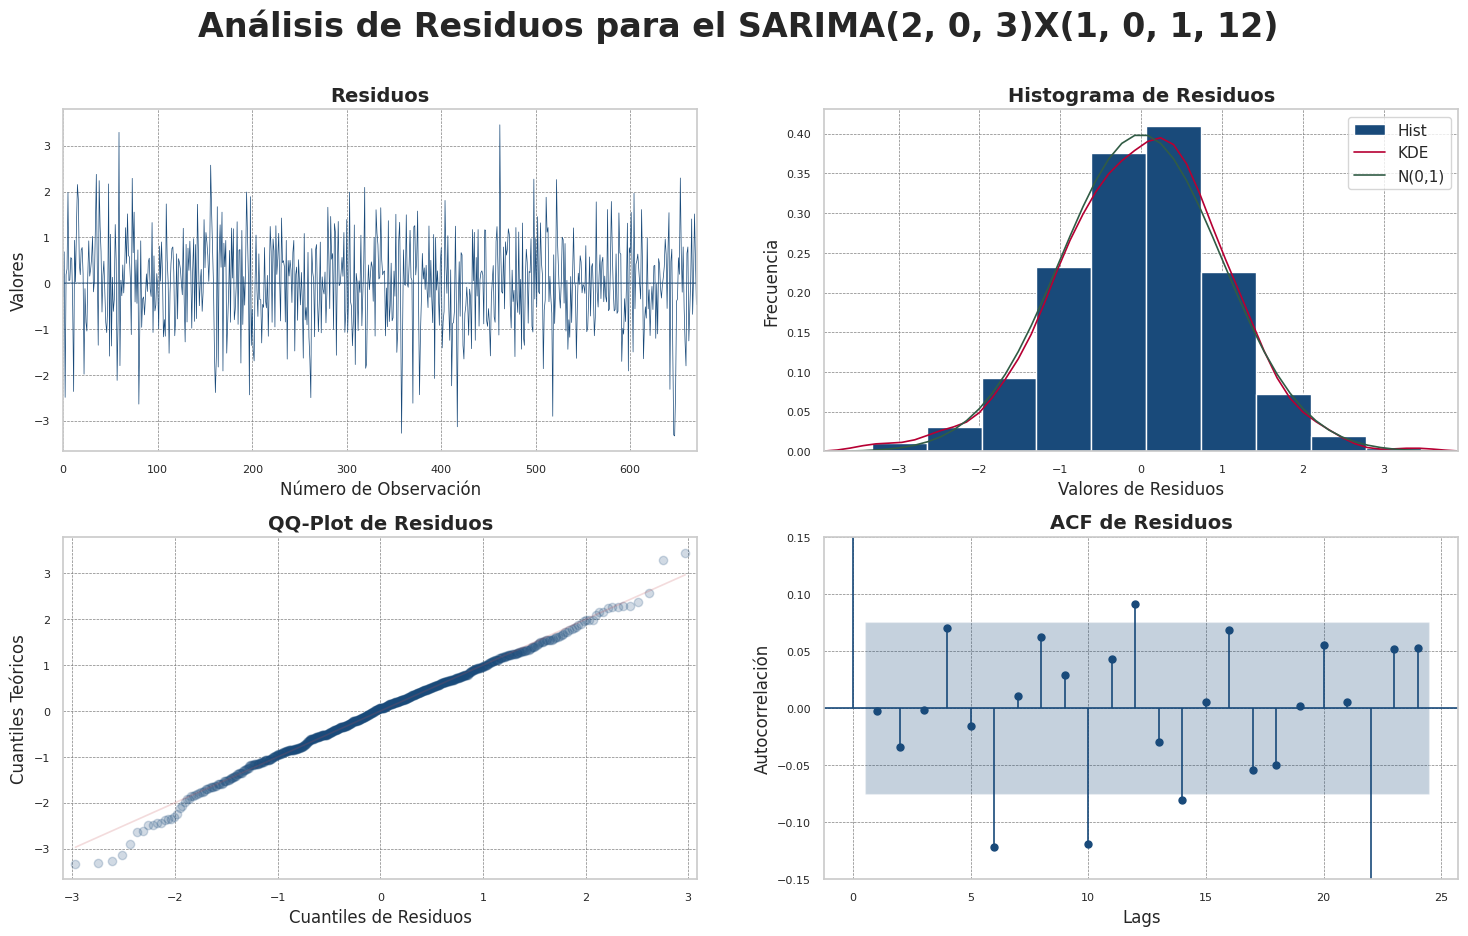

In [188]:
from matplotlib.collections import PathCollection

fig = modelo.plot_diagnostics(figsize=(18, 10), lags=24)

axes = fig.axes
# Cambiar el primer gráfico a la izquierda
axes[0].set_title("Residuos")
axes[0].set_ylabel("Valores")
axes[0].set_xlabel("Número de Observación")
for line in axes[0].lines:
    line.set_linewidth(0.5)

# Cambiar el segundo gráfico a la derecha
axes[1].set_title("Histograma de Residuos")
axes[1].set_ylabel("Frecuencia")
axes[1].set_xlabel("Valores de Residuos")
# Cambiar el color de las lineas


# Cambiar el tercer gráfico de abajo a la izquierda
axes[2].set_title("QQ-Plot de Residuos")
axes[2].set_ylabel("Cuantiles Teóricos")
axes[2].set_xlabel("Cuantiles de Residuos")
for line in axes[2].lines:
    # line.set_markerfacecolor('green')
    # line.set_markeredgecolor('white')
    line.set_alpha(0.2)

# Cambiar el cuarto gráfico de abajo a la derecha
axes[3].set_title("ACF de Residuos")
axes[3].set_ylabel("Autocorrelación")
axes[3].set_xlabel("Lags")
axes[3].set_ylim(-0.15, 0.15)

plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.suptitle("Análisis de Residuos para el SARIMA(2, 0, 3)X(1, 0, 1, 12)", fontsize=24, fontweight='bold')
plt.savefig('imagenes/05-analisis-de-residuos.svg', bbox_inches='tight')
plt.show()


# **FORECAST**

In [189]:
# Pronóstico para 12 meses hacia el futuro
forecast = modelo.forecast(steps=12)

In [190]:
# Obtener pronóstico con intervalos
pred = modelo.get_forecast(steps=12)

In [191]:
# Media pronosticada
forecast_mean = pred.predicted_mean
forecast_mean

array([-0.99789421, -1.03268914, -0.79171869, -0.33507254,  0.21001776,
        0.69302886,  0.98170271,  0.99825131,  0.74030119,  0.280943  ,
       -0.2519603 , -0.71135402])

In [192]:
# Intervalos de confianza
int_conf = pred.conf_int()
int_conf

array([[-2.15055255,  0.15476414],
       [-2.21937441,  0.15399614],
       [-1.98498861,  0.40155122],
       [-1.52885523,  0.85871016],
       [-0.98548498,  1.4055205 ],
       [-0.51120969,  1.89726741],
       [-0.23666782,  2.20007325],
       [-0.23249486,  2.22899748],
       [-0.49584324,  1.97644561],
       [-0.95546346,  1.51734947],
       [-1.49039038,  0.98646977],
       [-1.95845092,  0.53574287]])

In [193]:
# Obtenemos el forecast real
forecast_real = pt.inverse_transform(forecast_mean.reshape(-1, 1))

In [194]:
# Los intervalos de confianza reales
lower_bound_real = pt.inverse_transform(int_conf[:, 0].reshape(-1, 1))
upper_bound_real = pt.inverse_transform(int_conf[:, 1].reshape(-1, 1))

In [195]:
# Generate forecast dates and plot forecast series
forecast_index = pd.date_range(start=pre.index[-2], periods=13, freq='ME')[1:]

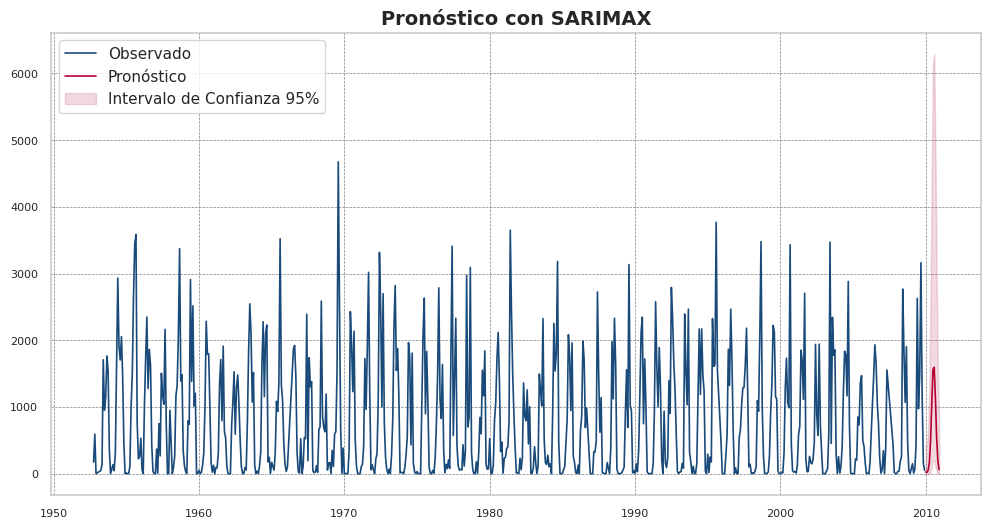

In [196]:
plt.figure()

# Serie original
plt.plot(pre, label='Observado')

# Pronóstico
plt.plot(forecast_index, forecast_real, label='Pronóstico', color=sns.color_palette()[1])

# Intervalos
plt.fill_between(forecast_index, 
                 lower_bound_real.flatten(),
                 upper_bound_real.flatten(),
                 color=sns.color_palette()[4], alpha=0.2, label='Intervalo de Confianza 95%')

plt.legend()
plt.title('Pronóstico con SARIMAX') 
plt.savefig('imagenes/06-pronostico-sarimax.svg', bbox_inches='tight')
plt.show()

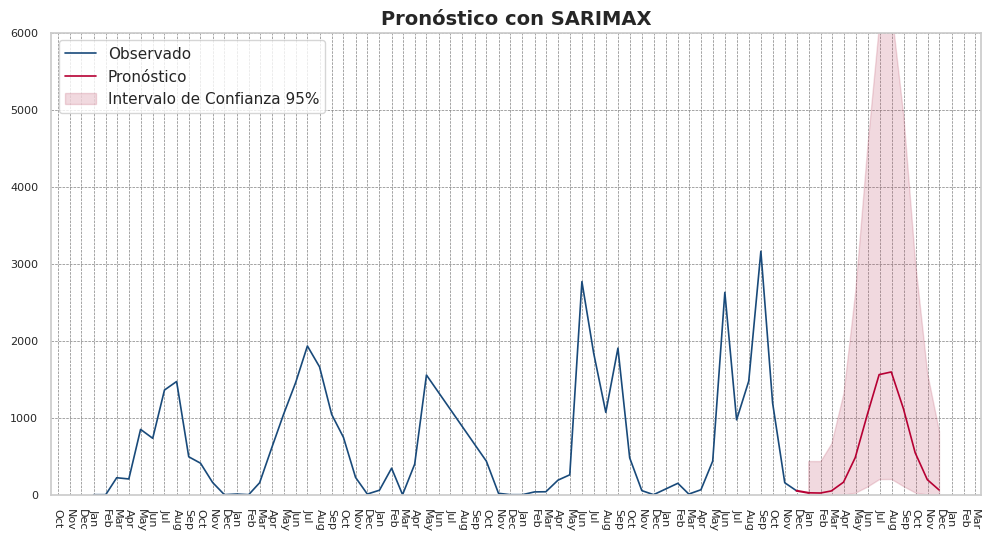

In [197]:
import matplotlib.dates as mdates

plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())           # set ticks every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))    # format ticks to show abbreviated month

# Filter the observed series from 2005 onward
obs = pre[pre.index >= '2005-01-01']

# Plot the observed series
plt.plot(obs, label='Observado')
plt.plot(forecast_index, forecast_real, label='Pronóstico', color=sns.color_palette()[1])

# Add a red line connecting the last observed point with the first forecast point
last_obs_date = obs.index[-1]
last_obs_value = obs.iloc[-1]
first_fc_date = forecast_index[0]
first_fc_value = forecast_real[0, 0]
plt.plot([last_obs_date, first_fc_date], [last_obs_value, first_fc_value], color=sns.color_palette()[1], linewidth=1.5)

# Intervalos
plt.fill_between(forecast_index, 
                 lower_bound_real.flatten(),
                 upper_bound_real.flatten(),
                 color=sns.color_palette()[4], alpha=0.2, label='Intervalo de Confianza 95%')

plt.xticks(rotation=270, size=8)
plt.legend()
plt.title('Pronóstico con SARIMAX')
plt.ylim(0, 6000)
plt.grid(True)
plt.savefig('imagenes/07-pronostico-sarimax-zoom.svg', bbox_inches='tight')
plt.show()

# **PRONÓSTICO ÓPTIMO**

In [140]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  672
Model:             SARIMAX(9, 0, 2)x(2, 0, 2, 12)   Log Likelihood                -598.424
Date:                            Thu, 24 Apr 2025   AIC                           1228.847
Time:                                    15:31:44   BIC                           1301.012
Sample:                                         0   HQIC                          1256.796
                                            - 672                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3205      0.353      0.908      0.364      -0.371       1.012
ar.L2          0.5444      0.375      1.452      0.147      -0.191       1.279
ar.L3         -0.1267      0.083     -1.520      0.128      -0.290       0.037
ar.L4         -0.0983      0.057     -1.713      0.087      -0.211       0.014
ar.L5         -0.1701      0.050     -3.381      0.001      -0.269      -0.071
ar.L6         -0.2097      0.069     -3.034      0.002      -0.345      -0.074
ar.L7          0.0230      0.087      0.265      0.791      -0.147       0.193
ar.L8          0.1291      0.085      1.516      0.130      -0.038       0.296
ar.L9          0.1375      0.044      3.139      0.002       0.052       0.223
ma.L1         -0.0575      0.356     -0.162      0.871      -0.755       0.640
ma.L2         -0.4694      0.303     -1.549      0.121      -1.063       0.125
ar.S.L12       0.7938      4.852      0.164      0.870      -8.716      10.304
ar.S.L24       0.1024      4.427      0.023      0.982      -8.575       8.779
ma.S.L12      -0.7160      4.859     -0.147      0.883     -10.240       8.808
ma.S.L24      -0.0839      4.031     -0.021      0.983      -7.984       7.816
sigma2         0.3454      0.019     18.571      0.000       0.309       0.382
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.72
Prob(Q):                              0.96   Prob(JB):                         0.03
Heteroskedasticity (H):               0.83   Skew:                            -0.22
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$$
(1
- 1.7104 \, B 
+ 0.9855 \, B^2 
- 0.8782 \, B^{12})W_t=
(1
- 1.4789 \, B 
+ 0.7053 \, B^2 
+ 0.0654 \, B^3
- 0.8071 \, B^{12})\varepsilon_{t}
$$

$W_t = T(X_t)$ con la transformación de Yeo-Johnson y $\varepsilon_t \sim \mathcal{N}(0, 1)$

$$
W_t = 
1.7104 \, W_{t-1} 
- 0.9855 \, W_{t-2} 
+ 0.8782 \, W_{t-12}
+ \varepsilon_t 
- 1.4789 \, \varepsilon_{t-1} 
+ 0.7053 \, \varepsilon_{t-2} 
+ 0.0654 \, \varepsilon_{t-3} 
- 0.8071 \, \varepsilon_{t-12}
$$

$$
W_t(h) = 
1.71 \, \underset{t}{\mathbb{E}}[W_{t+h-1}] 
- 0.99 \, \underset{t}{\mathbb{E}}[W_{t+h-2}] 
+ 0.88 \, \underset{t}{\mathbb{E}}[W_{t+h-12}]
+ \underset{t}{\mathbb{E}}[\varepsilon_{t+h}] 
- 1.48 \, \underset{t}{\mathbb{E}}[\varepsilon_{t+h-1}] 
+ 0.71 \, \underset{t}{\mathbb{E}}[\varepsilon_{t+h-2}] 
+ 0.07 \, \underset{t}{\mathbb{E}}[\varepsilon_{t+h-3}] 
- 0.81 \, \underset{t}{\mathbb{E}}[\varepsilon_{t+h-12}]
$$

In [141]:
res = modelo.resid

In [142]:
pd.DataFrame(res).to_csv('residuos.csv', index=False)
pd.DataFrame(ypre).to_csv('ypre.csv', index=False)

In [143]:
from pronostico_optimo import *

In [144]:
pronosticos, lower, upper = po(H=12, modelo=modelo, ypre=ypre, res=res, t0=671)

In [145]:
# inversa de Yeo-Jhonson
pronostico_real_eco = pt.inverse_transform(pronosticos)
lower_real_eco = pt.inverse_transform(lower)
upper_real_eco = pt.inverse_transform(upper)

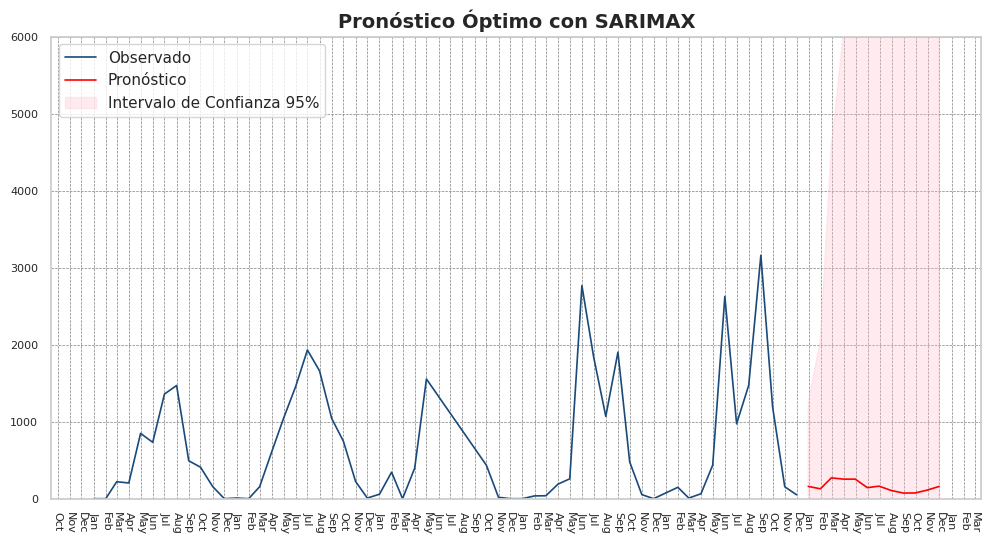

In [146]:
import matplotlib.dates as mdates

plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # set ticks every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # format ticks to show abbreviated month

# Filter the observed series from 2005 onward
obs = pre[pre.index >= '2005-01-01']

# Plot the observed series
plt.plot(obs, label='Observado')
plt.plot(forecast_index, pronostico_real_eco, label='Pronóstico', color='red')


# Intervalos
plt.fill_between(forecast_index, 
                 lower_real_eco.flatten(),
                 upper_real_eco.flatten(),
                 color='pink', alpha=0.3, label='Intervalo de Confianza 95%')

plt.xticks(rotation=270, size=8)
plt.legend()
plt.title('Pronóstico Óptimo con SARIMAX')
plt.ylim(0, 6000)
plt.grid(True)
plt.savefig('imagenes/08-pronostico-optimo-sarimax.svg', bbox_inches='tight')
plt.show()